![Popolo Data from 1MDB US DoJ Filing](http://sinarproject.org/en/projects/popit-api-database/officer-2.png/@@images/6a15252f-cf77-4ab2-97cf-1c6b37f94fb1.png)

In [15]:
import requests
from IPython.display import Image
from IPython.core.display import HTML

In [16]:
query ='organizations.name:1Malaysia Development Berhad Management AND label:Chief Executive Officer'

r = requests.get('http://api.popit.sinarproject.org/en/search/posts?q='+query)
memberships = r.json()['results'][0]['memberships']

len(memberships)

3

We now test for who held these posts between 2009 and 2013

In [17]:
from dateutil import parser
import datetime
for member in memberships:
    print member['person']['name']

Shahrol Azral Ibrahim Halmi
Mohd Hazem Abdul Rahman
Arul Kanda


In [26]:
from dateutil import parser
import datetime
for member in memberships:
    start_date = parser.parse(member['start_date']).date()
    if member['end_date']:
        end_date = parser.parse(member['end_date']).date()
    else:
        end_date = datetime.date.today()
    
    #this date is in between 2009 and 2013
    test_date = parser.parse('2010-01-01').date()
    
    if start_date <= test_date <= end_date:
        print member['person']['name']
        print "popit id: %s" % member['id']
        print member['start_date']
        mugshot = Image(url=member['person']['image'],embed=True)

Shahrol Azral Ibrahim Halmi
popit id: fbaf165b9a674799b40ec6fce39676a7
2009-02-01T000000


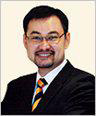

In [27]:
mugshot

#Citations

In [20]:
def citation(popit_id,fieldname):
    r = requests.get('http://api.popit.sinarproject.org/en/memberships/' +popit_id + '/citations/' + fieldname)
    result = r.json()['results'][0]
    return {'note':result['note'],'url':result['url']}

In [21]:
del start_date
del end_date

for member in memberships:
   
    start_date = parser.parse(member['start_date']).date()
    if not member['end_date']:
        end_date = 'present'
    else:
        end_date = parser.parse(member['end_date']).date()
        
    print "%s was CEO from %s to %s " % (member['person']['name'], start_date, end_date)

    citations = citation(member['id'],'start_date')
    print "Citation for membership start: %s, %s " % (citations['note'],citations['url'])
    
    if member['end_date']:
        citations = citation(member['id'],'end_date')
        print "Citation for membership end: %s \n %s " % (citations['note'],citations['url'])
    print '\n'


Shahrol Azral Ibrahim Halmi was CEO from 2009-02-01 to 2013-03-31 
Citation for membership start: Personal LinkedIn Profile page retrieved July 24, 2016, https://www.linkedin.com/in/shahrol-halmi-82942479 
Citation for membership end: Personal LinkedIn Profile page retrieved July 24, 2016 
 https://www.linkedin.com/in/shahrol-halmi-82942479 


Mohd Hazem Abdul Rahman was CEO from 2013-03-25 to 2015-01-05 
Citation for membership start: 1MDB Press Release published on corporate website, https://web.archive.org/web/20160723071611/http://1mdb.com.my/press-release/hazem-is-1mdb-md-and-ceo 
Citation for membership end: Retrieved Malaysiakini website 2016-07-23 
 https://www.malaysiakini.com/news/285411 


Arul Kanda was CEO from 2015-01-05 to present 
Citation for membership start: Corporate Website Press Release Retrieved: 2016-07-23, http://web.archive.org/web/20160723080302/http://www.1mdb.com.my/press-release/appointment-of-arul-kanda-as-president-group-executive-director 


